In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn import metrics, datasets, neighbors
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

In [2]:
file_to_open = "G:/Documents/Data Science/GitKraken/Final-Project-David-Adam-/Working Datasets/HealthInvestigation2015.csv"
HealthInv15 = pd.read_csv(file_to_open)
HealthInv15_toRecode = pd.read_csv(file_to_open)

In [3]:
HealthInv15.SmokingMale2015 = HealthInv15_toRecode.SmokingMale2015.astype(int)
HealthInv15.CompulsoryEdu2015 = HealthInv15_toRecode.CompulsoryEdu2015.astype(int)
HealthInv15.SmokingFemale2015 = HealthInv15_toRecode.SmokingFemale2015.astype(int)
HealthInv15.SmokingTotal2015 = HealthInv15_toRecode.SmokingTotal2015.astype(int)
HealthInv15.DeathCom2015 = HealthInv15_toRecode.DeathCom2015.astype(int)
HealthInv15.DeathNonCom2015 = HealthInv15_toRecode.DeathNonCom2015.astype(int)
HealthInv15.PopTotal2015 = HealthInv15_toRecode.PopTotal2015.astype(int)
HealthInv15.TotalLand2015 = HealthInv15_toRecode.TotalLand2015.astype(int)
HealthInv15.HealthPC2015 = HealthInv15_toRecode.HealthPC2015.astype(int)
HealthInv15.LifeTotal2015 = HealthInv15_toRecode.LifeTotal2015.astype(int)

In [4]:
#HealthInv15_toRecode.HealthPC2015.head()
#HealthInv15_toRecode.LifeTotal2015.head()

In [83]:
#HealthInv15.head()

In [99]:
x = HealthInv15[['CompulsoryEdu2015','SmokingMale2015','SmokingFemale2015', 'SmokingTotal2015', 'DeathCom2015', 'DeathNonCom2015','PopTotal2015','TotalLand2015','HealthPC2015','Income.Group']]
y = HealthInv15['LifeTotal2015']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state=1618)

In [101]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_train.shape)

(85, 10) (85,)
(37, 10) (85,)


In [102]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

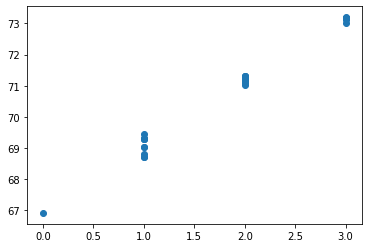

In [188]:
predictions = lm.predict(x_test)
predictions
plt.scatter(y_test, predictions)

In [189]:
print("Score:", lm.score(x_test, y_test))

Score: -6874.445445177638


In [190]:
metrics.mean_absolute_error(y_test, predictions)

69.02234909958308

In [191]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

69.02808750205807

In [192]:
kfold = KFold(5, True, 666)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [  2   4   5   7   9  10  11  12  13  14  16  17  18  19  20  21  23  24
  25  26  27  28  29  30  33  34  35  36  38  39  40  41  42  43  45  46
  47  48  49  50  51  52  53  55  57  60  61  62  63  64  66  67  68  69
  70  72  73  74  75  76  77  78  79  80  81  82  84  85  87  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 104 105 107 108 109 111 112
 113 115 116 117 118 119 120], test: [  0   1   3   6   8  15  22  31  32  37  44  54  56  58  59  65  71  83
  86  88 103 106 110 114 121]
train: [  0   1   2   3   5   6   7   8   9  11  13  14  15  16  19  20  22  23
  24  26  27  28  30  31  32  33  34  36  37  38  39  42  43  44  45  46
  47  48  51  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70
  71  72  73  74  75  76  77  78  79  82  83  85  86  87  88  89  90  91
  92  93  94  95  97  98  99 101 102 103 104 105 106 107 108 109 110 111
 113 114 116 118 119 120 121], test: [  4  10  12  17  18  21  25  29  35  40  41  49  50  52  53  55  66  80
  81  

Unsupervised Machine Learning

In [193]:
print(cross_val_score(lm, x,y, cv=9))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [194]:
Health_kmeans = HealthInv15.drop('Country.Name', axis=1)
#Health_kmeans = Health_kmeans.drop('Country', axis=1)

In [195]:
Health_kmeans.head()

,Unnamed: 0,CompulsoryEdu2015,SmokingMale2015,SmokingFemale2015,SmokingTotal2015,DeathCom2015,DeathNonCom2015,PopTotal2015,TotalLand2015,HealthPC2015,Income.Group,LifeTotal2015
0,1,9,51,7,29,2,93,2880703,27400,264,2,78
1,2,10,30,0,15,15,75,39728025,2381740,290,2,76
2,3,14,28,17,22,15,78,43131966,2736690,1298,2,76
3,4,12,52,1,24,3,92,2925553,28470,366,2,74
4,5,10,17,13,15,4,89,23815995,7682300,4887,3,82


In [196]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(Health_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [197]:
#plt.figure(figsize=(10,6))
#plt.title('K Means')
#plt.scatter(Health_kmeans['HealthPC2015'], Health_kmeans['LifeTotal2015'], c=kmeans.labels_, cmap='tab10')
#print(kmeans.labels_)
#print(kmeans.cluster_centers_)
print(Health_kmeans.describe())

       Unnamed: 0  CompulsoryEdu2015  SmokingMale2015  SmokingFemale2015  \
count  122.000000         122.000000       122.000000         122.000000   
mean    61.500000           9.786885        32.450820          10.852459   
std     35.362409           2.279008        13.867795          10.505152   
min      1.000000           5.000000         7.000000           0.000000   
25%     31.250000           9.000000        22.000000           2.000000   
50%     61.500000          10.000000        32.000000           7.000000   
75%     91.750000          11.000000        41.000000          19.000000   
max    122.000000          15.000000        79.000000          37.000000   

       SmokingTotal2015  DeathCom2015  DeathNonCom2015  PopTotal2015  \
count        122.000000    122.000000       122.000000  1.220000e+02   
mean          21.639344     18.245902        72.770492  5.146540e+07   
std            9.380889     19.284007        20.912169  1.750911e+08   
min            4.000000    

In [198]:
Health_kmeans = Health_kmeans.drop('Unnamed: 0', axis=1)
#Health_kmeans = Health_kmeans.drop('LifeTotal2015', axis=1)

In [199]:
scaler = StandardScaler()
scaler.fit(Health_kmeans)
scaledVariables = scaler.transform(Health_kmeans)
HealthNN_scaled = pd.DataFrame(scaledVariables, columns=Health_kmeans.columns)
HealthNN_scaled.head()

,CompulsoryEdu2015,SmokingMale2015,SmokingFemale2015,SmokingTotal2015,DeathCom2015,DeathNonCom2015,PopTotal2015,TotalLand2015,HealthPC2015,Income.Group,LifeTotal2015
0,-0.346699,1.343088,-0.368233,0.787879,-0.845929,0.971345,-0.278627,-0.387283,-0.537412,0.064150,0.687075
1,0.093898,-0.177456,-1.037321,-0.710671,-0.169015,0.107053,-0.067312,0.947371,-0.524004,0.064150,0.421391
2,1.856285,-0.322270,0.587606,0.038604,-0.169015,0.251101,-0.047791,1.148589,-0.004155,0.064150,0.421391
3,0.975091,1.415495,-0.941737,0.252683,-0.793858,0.923329,-0.278369,-0.386677,-0.484809,0.064150,0.155708
4,0.093898,-1.118746,0.205270,-0.710671,-0.741788,0.779280,-0.158566,3.952211,1.846772,1.042438,1.218442


In [200]:
x = HealthNN_scaled.loc[:,'CompulsoryEdu2015':'Income.Group']
#y = HealthNN_scaled['LifeTotal2015'].astype('int')
y = Health_kmeans['Income.Group']

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=666)

In [202]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [203]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.88      0.70      0.78        10
           2       0.69      0.75      0.72        12
           3       0.78      0.88      0.82         8

    accuracy                           0.77        31
   macro avg       0.84      0.83      0.83        31
weighted avg       0.78      0.77      0.77        31



Text(0, 0.5, 'Error Rate')

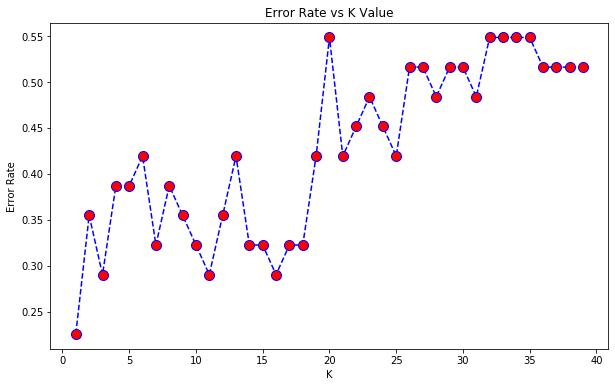

In [204]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))
plt.figure(figsize=(10,6))

plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [205]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Health_kmeans)
Health_kmeans['Group'] = kmeans.labels_
Health_kmeans['Country'] = HealthInv15['Country.Name']

In [206]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))

[[1 0 0 0]
 [2 6 1 1]
 [0 4 5 3]
 [0 0 0 8]]


In [207]:
Health_kmeans.groupby('Group').mean()

,CompulsoryEdu2015,SmokingMale2015,SmokingFemale2015,SmokingTotal2015,DeathCom2015,DeathNonCom2015,PopTotal2015,TotalLand2015,HealthPC2015,Income.Group,LifeTotal2015
Group,,,,,,,,,,,
0,8.500000,34.500000,2.0000,18.000000,15.000000,75.000000,1.340686e+09,6.180700e+06,225.000000,1.500000,71.500000
1,9.758929,32.366071,11.3125,21.830357,17.955357,73.080357,1.810705e+07,4.543821e+05,1284.285714,1.955357,72.973214
2,10.500000,33.125000,6.6250,19.875000,23.125000,67.875000,1.961772e+08,2.929682e+06,1881.125000,1.750000,71.125000


In [208]:
Health_kmeans.to_csv(r'G:\Documents\Data Science\GitKraken\Final-Project-David-Adam-\Working Datasets\Health_kmeans.csv', index = False)

In [209]:
print(Health_kmeans.describe())

       CompulsoryEdu2015  SmokingMale2015  SmokingFemale2015  \
count         122.000000       122.000000         122.000000   
mean            9.786885        32.450820          10.852459   
std             2.279008        13.867795          10.505152   
min             5.000000         7.000000           0.000000   
25%             9.000000        22.000000           2.000000   
50%            10.000000        32.000000           7.000000   
75%            11.000000        41.000000          19.000000   
max            15.000000        79.000000          37.000000   

       SmokingTotal2015  DeathCom2015  DeathNonCom2015  PopTotal2015  \
count        122.000000    122.000000       122.000000  1.220000e+02   
mean          21.639344     18.245902        72.770492  5.146540e+07   
std            9.380889     19.284007        20.912169  1.750911e+08   
min            4.000000      1.000000        25.000000  9.341900e+04   
25%           14.000000      4.250000        65.250000  3.59690

In [210]:
HealthNN_scaled.dtypes

CompulsoryEdu2015    float64
SmokingMale2015      float64
SmokingFemale2015    float64
SmokingTotal2015     float64
DeathCom2015         float64
DeathNonCom2015      float64
PopTotal2015         float64
TotalLand2015        float64
HealthPC2015         float64
Income.Group         float64
LifeTotal2015        float64
dtype: object

In [214]:
X = pd.DataFrame(HealthNN_scaled)
X = X[['SmokingFemale2015','SmokingMale2015']].values
Y = Health_kmeans['Group']
#Y = {'LifeExp': [65, 70, 75]} 
#Y = pd.DataFrame(Y)
h = .2
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [223]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

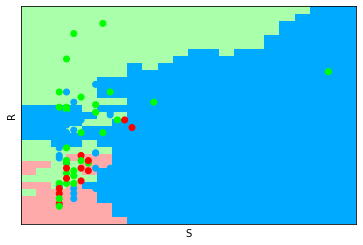

In [228]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1,)
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, cmap=cmap_bold)
plt.xlabel('S')
plt.ylabel('R')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [218]:
clf = neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance')
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

In [219]:
# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [220]:
print(xx.shape)
print(yy.shape)
print(np.c_[xx.ravel(), yy.ravel()].shape)

(37, 28)
(37, 28)
(1036, 2)


In [226]:
# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

ValueError: query data dimension must match training data dimension

NameError: name 'n_neighbors' is not defined

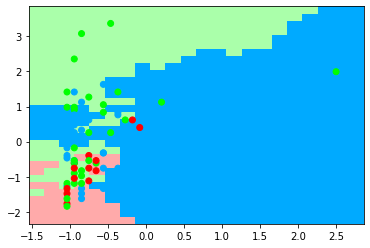

In [227]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()